In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# make text bigger for the report
plt.rcParams.update({
    'font.size': 24,
    'axes.labelsize': 36,
    'axes.titlesize': 22,
    'xtick.labelsize': 14,
    'ytick.labelsize': 18, 
    'legend.fontsize': 30,
    'figure.titlesize': 24,
    'lines.linewidth': 3,
})

In [28]:
file_name = "DATA/VENUS_EXPRESS/VEX_NDMW0D0A_2023_01_11_12_55_55.900.txt"
df = pd.read_csv(file_name, index_col=0, sep="\t")
df.index = pd.to_datetime(df.index)
df.resample("D").mean()
df.head()

,NDMW0D0A
DATE_TIME,
2005-11-09 00:09:04.575,0
2005-11-09 00:10:08.575,0
2005-11-09 00:11:12.576,0
2005-11-09 00:12:16.576,0
2005-11-09 00:13:20.577,0


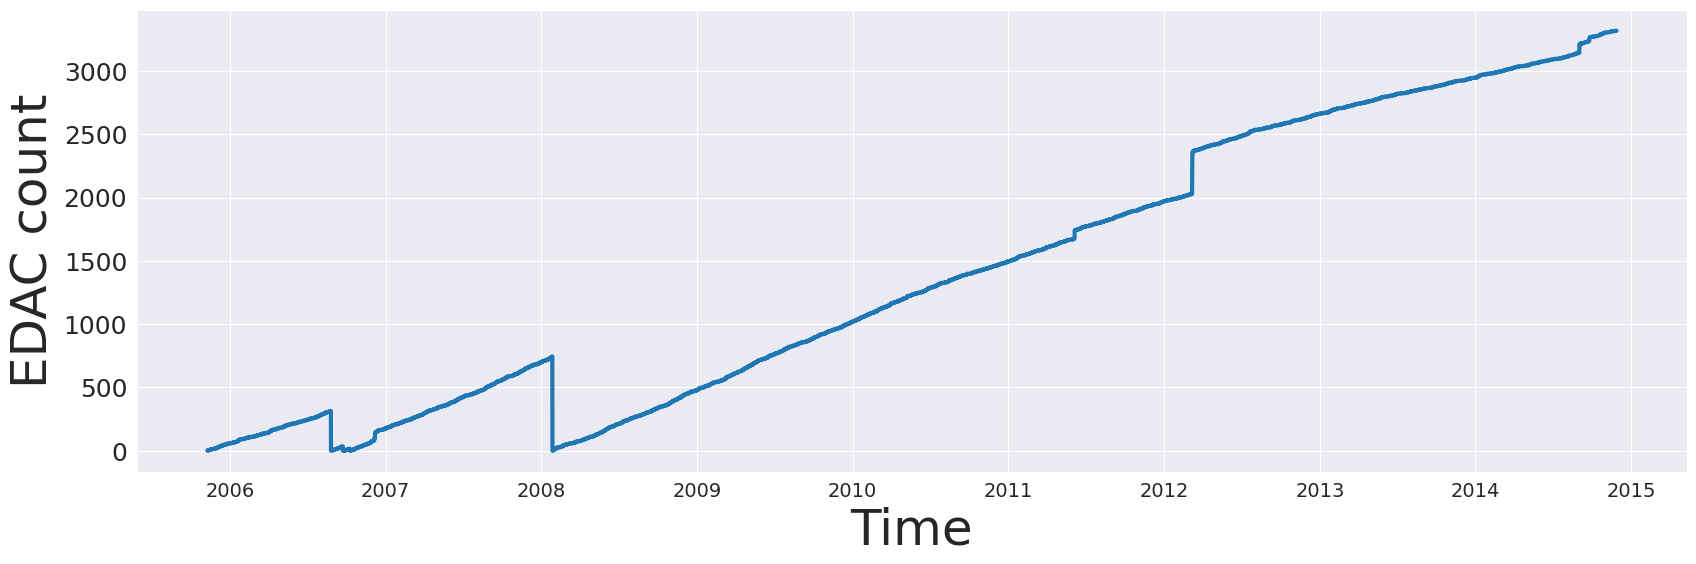

In [29]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df, label="EDAC counter")
ax.set_ylabel("EDAC count")
ax.set_xlabel("Time")
plt.show()

In [30]:
diff = df.diff()
diff[diff < 0] = 0

df_new = diff.cumsum()
df_new.head()

,NDMW0D0A
DATE_TIME,
2005-11-09 00:09:04.575,NaN
2005-11-09 00:10:08.575,0.0
2005-11-09 00:11:12.576,0.0
2005-11-09 00:12:16.576,0.0
2005-11-09 00:13:20.577,0.0


AttributeError: 'Text' object has no property 'linewidth'

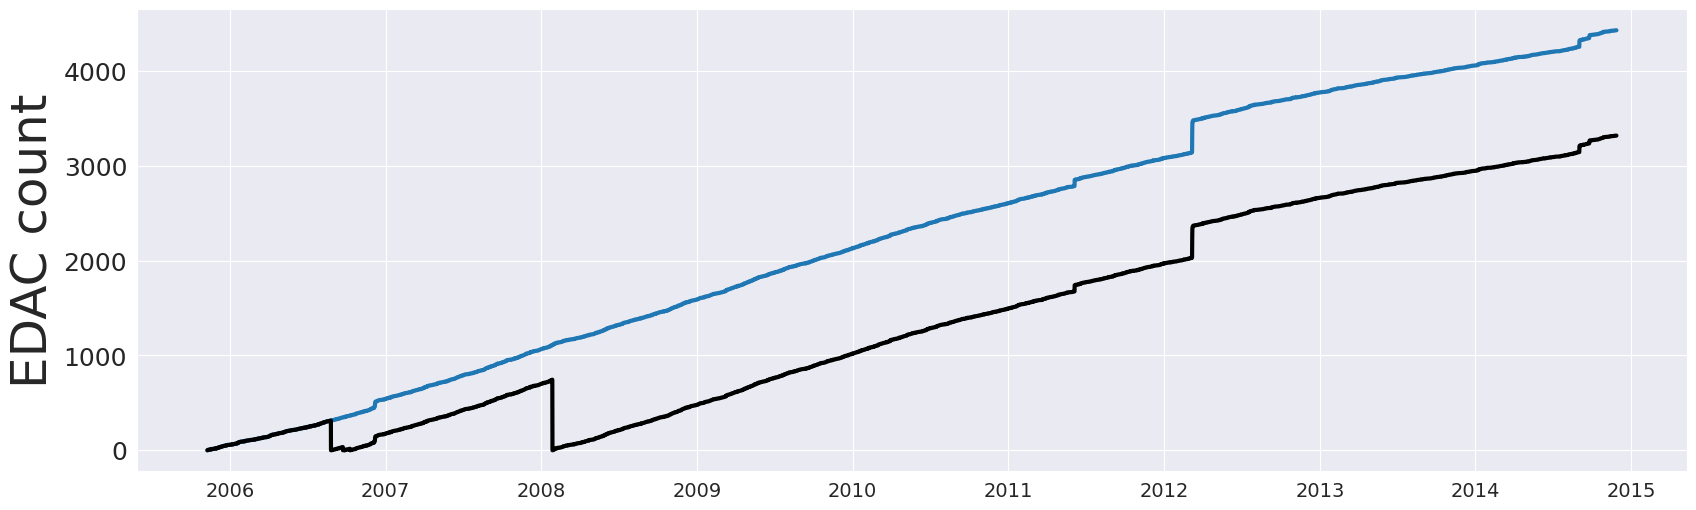

In [31]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df_new, label="Corrected")
ax.plot(df, label="Raw", color="black", linewidth=3)
ax.set_ylabel("EDAC count", linewidth=3)
ax.set_xlabel("Time")
plt.legend()
plt.show()